# 1. Downloading Datasets

In [2]:
!pip install datasets

import nltk

# Download punkt tokenizer data
nltk.download('punkt')

# If you still face issues, also download everything from nltk data
nltk.download('all')

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 37.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 19.1 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downlo

True

In [3]:
import pandas as pd
from datasets import load_dataset

# Load the datasets
db = load_dataset("Gaborandi/diabetes_mellitus_type2_pubmed_abstracts")
al = load_dataset("Gaborandi/Alzheimer_pubmed_abstracts")
lk = load_dataset("Gaborandi/Acute_Lymphoblastic_Leukemia_pubmed_abstracts")
st = load_dataset("Gaborandi/Stroke_pubmed_abstracts")
hv = load_dataset("Gaborandi/HIV_pubmed_abstracts")

# Convert the datasets to Pandas DataFrames with labels
def prepare_dataframe(dataset, label):
    df = dataset["train"].to_pandas()
    df = df[['abstract']]
    df = df.dropna(subset=['abstract'])  # Remove rows with missing abstracts
    df = df[df['abstract'].str.strip() != '']  # Remove rows with empty abstracts
    df['label'] = label
    return df

db = prepare_dataframe(db, 'Diabetes')
al = prepare_dataframe(al, 'Alzheimer')
lk = prepare_dataframe(lk, 'Leukemia')
st = prepare_dataframe(st, 'Stroke')
hv = prepare_dataframe(hv, 'HIV')

# Sample 200 records from each DataFrame
db_sampled = db.sample(n=200, random_state=420)
al_sampled = al.sample(n=200, random_state=420)
lk_sampled = lk.sample(n=200, random_state=420)
st_sampled = st.sample(n=200, random_state=420)
hv_sampled = hv.sample(n=200, random_state=420)

# Merge the sampled DataFrames into one
merged_df_raw = pd.concat([db_sampled, al_sampled, lk_sampled, st_sampled, hv_sampled], ignore_index=True)

# Check the structure of the merged DataFrame
print(merged_df_raw.head())



/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/214 [00:00<?, ?B/s]

Repo card metadata block was not found. Setting CardData to empty.


Type_2_diabetes.csv:   0%|          | 0.00/14.8M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/9466 [00:00<?, ? examples/s]

README.md:   0%|          | 0.00/225 [00:00<?, ?B/s]

Repo card metadata block was not found. Setting CardData to empty.


alzheimers.csv:   0%|          | 0.00/13.7M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/9586 [00:00<?, ? examples/s]

README.md:   0%|          | 0.00/233 [00:00<?, ?B/s]

Repo card metadata block was not found. Setting CardData to empty.


ALL.csv:   0%|          | 0.00/12.1M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/8817 [00:00<?, ? examples/s]

README.md:   0%|          | 0.00/211 [00:00<?, ?B/s]

Repo card metadata block was not found. Setting CardData to empty.


stroke.csv:   0%|          | 0.00/15.5M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/9340 [00:00<?, ? examples/s]

README.md:   0%|          | 0.00/208 [00:00<?, ?B/s]

Repo card metadata block was not found. Setting CardData to empty.


HIV.csv:   0%|          | 0.00/14.6M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/9235 [00:00<?, ? examples/s]

                                            abstract     label
0  The ability of interleukin (IL)-32α to induce ...  Diabetes
1  Diabetic nephropathy (DN) is one microvascular...  Diabetes
2  Ginkgo leaf tablet (GLT), a traditional Chines...  Diabetes
3  Dapagliflozin, an inhibitor of sodium-glucose ...  Diabetes
4  The urinary bladder is a mechanosensitive orga...  Diabetes


# 2. Preprocessing the dataset

Removing stopwords and words that might give away the result such as 'diabetes', 'alzheimer', 'leukemia', 'stroke', 'hiv', 'type 2', 'alzheimers', 'leukemia', 'lymphoblastic'

In [4]:
import re
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split


def utils_preprocess_text(text, flg_stemm=False, flg_lemm=True, lst_stopwords=None):
    """Preprocess the text by removing stopwords, lemmatizing, and cleaning."""
    ## clean (convert to lowercase and remove punctuations and characters and then strip)
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())

    ## Additional pattern removal for specific words
    lst_frequentwords = ['diabetes', 'alzheimer', 'leukemia', 'stroke', 'hiv', '2', 'alzheimers', 'leukemia', 'lymphoblastic', 'mellitus', 'cardiovascular']
    if lst_stopwords is not None:
        lst_stopwords.extend(lst_frequentwords)

    ## Tokenize (convert from string to list)
    lst_text = text.split()

    ## Remove stopwords
    if lst_stopwords is not None:
        lst_text = [word for word in lst_text if word not in lst_stopwords]

    ## Stemming (remove -ing, -ly, ...)
    if flg_stemm:
        ps = nltk.stem.porter.PorterStemmer()
        lst_text = [ps.stem(word) for word in lst_text]

    ## Lemmatisation (convert the word into root word)
    if flg_lemm:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        lst_text = [lem.lemmatize(word) for word in lst_text]

    ## Back to string from list
    text = " ".join(lst_text)


    # Replace multiple spaces (including tabs) with a single space
    text = re.sub(r'\s+', ' ', text)

    return text

# Define English stopwords
stop_words = stopwords.words('english')

#Split the data into training and testing sets
df_raw_train, df_raw_test, df_raw_label_train, df_raw_label_test = train_test_split(merged_df_raw['abstract'], merged_df_raw['label'], test_size=0.2, random_state=420)

# Preprocess each abstract in the dataset
merged_df_train, merged_df_test, merged_df_label_train, merged_df_label_test = df_raw_train.copy(), df_raw_test.copy(), df_raw_label_train.copy(), df_raw_label_test.copy()
merged_df_train = merged_df_train.apply(lambda x: utils_preprocess_text(x, flg_stemm=False, flg_lemm=True, lst_stopwords=stop_words))
merged_df_test = merged_df_test.apply(lambda x: utils_preprocess_text(x, flg_stemm=False, flg_lemm=True, lst_stopwords=stop_words))



# Check the structure of the merged DataFrame

print(merged_df_train.head())
print(merged_df_test.head())
print(merged_df_label_train.head())
print(merged_df_label_test.head())

173    physical activity pa key behaviour patient typ...
886    comprehensive understanding trend incidence pr...
339    obstructive sleep apnea hypopnea syndrome osah...
401    lasparaginase cardinal biotherapeutic drug tre...
557    extensive study ql child completed acute treat...
Name: abstract, dtype: object
715    head injury associated significant shortterm m...
353    neurofibrillary tangle comprising hyperphospho...
507    13yearold female developed lasparaginase lasp ...
713    although aspirin effectively reduce occurrence...
553    limited data describing incidence symptomatic ...
Name: abstract, dtype: object
173     Diabetes
886          HIV
339    Alzheimer
401     Leukemia
557     Leukemia
Name: label, dtype: object
715       Stroke
353    Alzheimer
507     Leukemia
713       Stroke
553     Leukemia
Name: label, dtype: object


In [5]:
print(df_raw_train.head())
print(df_raw_test.head())
print(df_raw_label_train.head())
print(df_raw_label_test.head())

173    Physical activity (PA) is a key behaviour for ...
886    A more comprehensive understanding of the tren...
339    Obstructive sleep apnea hypopnea syndrome (OSA...
401    L-asparaginase is a cardinal biotherapeutic dr...
557    There are no extensive studies on the QL in ch...
Name: abstract, dtype: object
715    Head injury is associated with significant sho...
353    Neurofibrillary tangles comprising hyperphosph...
507    A 13-year-old female developed L-asparaginase ...
713    Although aspirin can effectively reduce the oc...
553    There are limited data describing incidence of...
Name: abstract, dtype: object
173     Diabetes
886          HIV
339    Alzheimer
401     Leukemia
557     Leukemia
Name: label, dtype: object
715       Stroke
353    Alzheimer
507     Leukemia
713       Stroke
553     Leukemia
Name: label, dtype: object


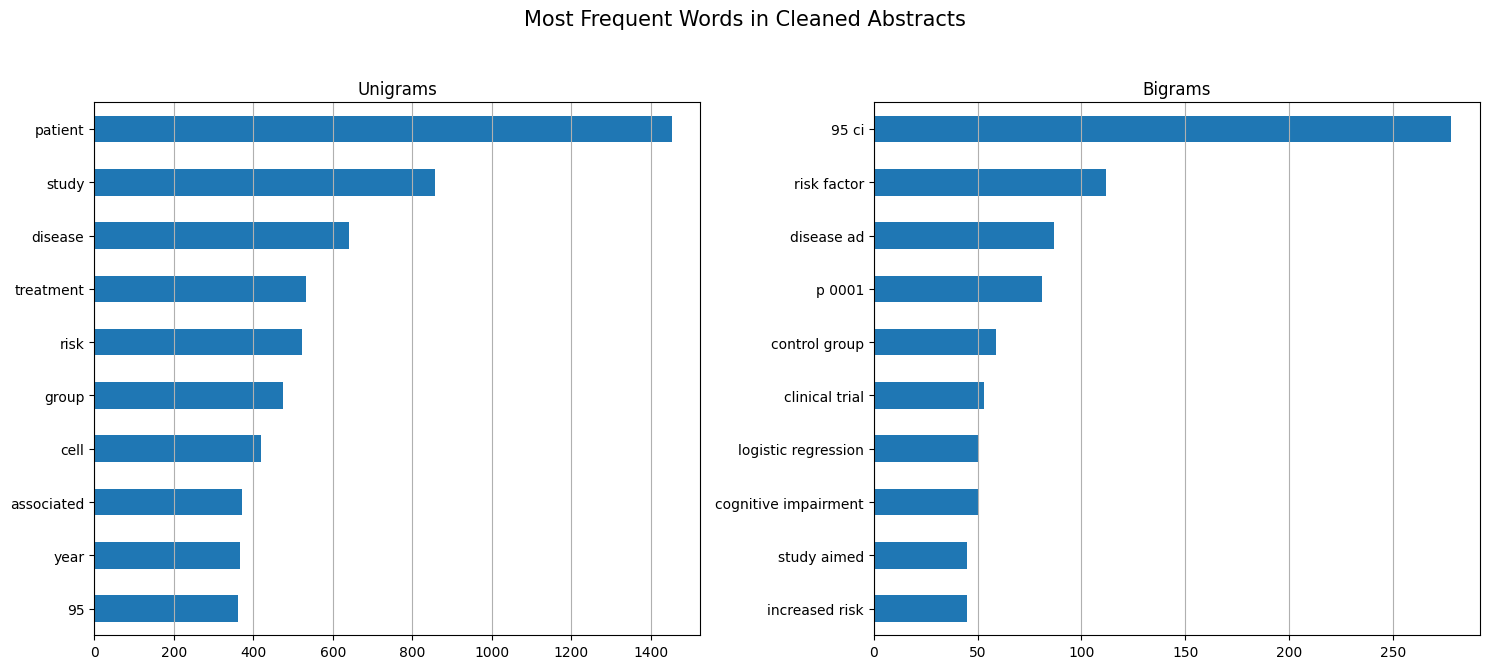

In [6]:
from sklearn import feature_extraction, manifold
import matplotlib.pyplot as plt



# Set the number of most frequent words to display
top = 10

# Tokenize the cleaned abstract column
corpus = merged_df_train
lst_tokens = nltk.tokenize.word_tokenize(corpus.str.cat(sep=" "))

# Create subplots for unigrams and bigrams
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))
fig.suptitle("Most Frequent Words in Cleaned Abstracts", fontsize=15)

# Unigrams
dic_words_freq = nltk.FreqDist(lst_tokens)
dtf_uni = pd.DataFrame(dic_words_freq.most_common(), columns=["Word", "Freq"])
dtf_uni.set_index("Word").iloc[:top, :].sort_values(by="Freq").plot(
    kind="barh", title="Unigrams", ax=ax[0], legend=False
).grid(axis="x")
ax[0].set(ylabel=None)

# Bigrams
dic_words_freq = nltk.FreqDist(nltk.ngrams(lst_tokens, 2))
dtf_bi = pd.DataFrame(dic_words_freq.most_common(), columns=["Word", "Freq"])
dtf_bi["Word"] = dtf_bi["Word"].apply(lambda x: " ".join(string for string in x))
dtf_bi.set_index("Word").iloc[:top, :].sort_values(by="Freq").plot(
    kind="barh", title="Bigrams", ax=ax[1], legend=False
).grid(axis="x")
ax[1].set(ylabel=None)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


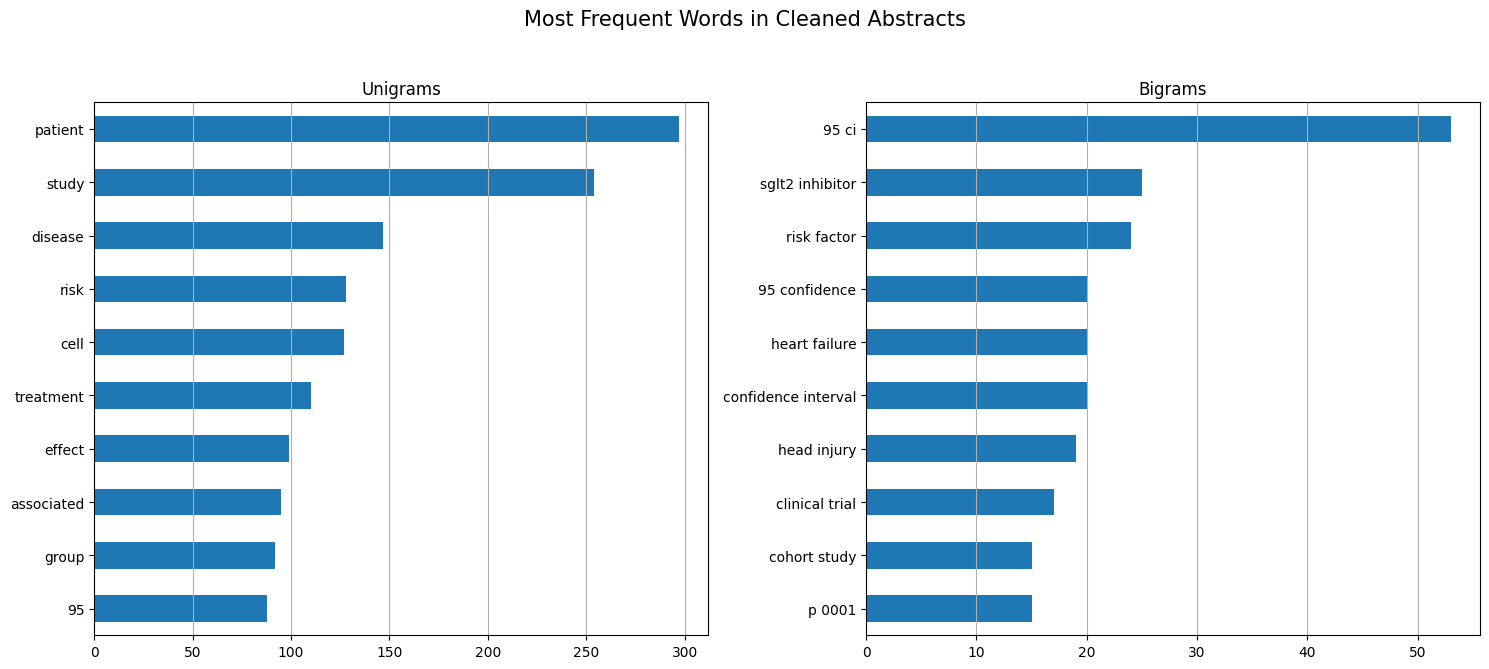

In [7]:
# Set the number of most frequent words to display
top = 10

# Tokenize the cleaned abstract column
corpus = merged_df_test
lst_tokens = nltk.tokenize.word_tokenize(corpus.str.cat(sep=" "))

# Create subplots for unigrams and bigrams
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))
fig.suptitle("Most Frequent Words in Cleaned Abstracts", fontsize=15)

# Unigrams
dic_words_freq = nltk.FreqDist(lst_tokens)
dtf_uni = pd.DataFrame(dic_words_freq.most_common(), columns=["Word", "Freq"])
dtf_uni.set_index("Word").iloc[:top, :].sort_values(by="Freq").plot(
    kind="barh", title="Unigrams", ax=ax[0], legend=False
).grid(axis="x")
ax[0].set(ylabel=None)

# Bigrams
dic_words_freq = nltk.FreqDist(nltk.ngrams(lst_tokens, 2))
dtf_bi = pd.DataFrame(dic_words_freq.most_common(), columns=["Word", "Freq"])
dtf_bi["Word"] = dtf_bi["Word"].apply(lambda x: " ".join(string for string in x))
dtf_bi.set_index("Word").iloc[:top, :].sort_values(by="Freq").plot(
    kind="barh", title="Bigrams", ax=ax[1], legend=False
).grid(axis="x")
ax[1].set(ylabel=None)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


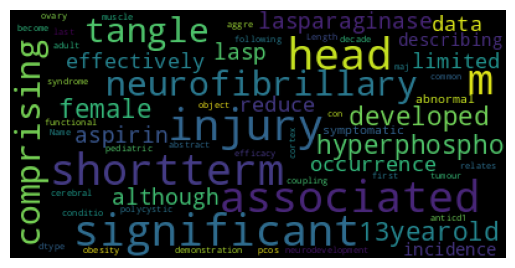

In [8]:
import wordcloud

wc = wordcloud.WordCloud(background_color='black', max_words=100,
                         max_font_size=35)
wc = wc.generate(str(corpus))
fig = plt.figure(num=1)
plt.axis('off')
plt.imshow(wc, cmap=None)
plt.show()

#Feature Engineering 2%

In [9]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Step 1: Assigning the test-train variables
X_train, X_test = merged_df_train, merged_df_test
y_train, y_test = merged_df_label_train, merged_df_label_test


# Step 2: Bag of Words (BoW) Transformation
bow_vectorizer = CountVectorizer(ngram_range=(1, 1))  # Unigrams
X_train_bow = bow_vectorizer.fit_transform(X_train)
X_test_bow = bow_vectorizer.transform(X_test)

print("BoW Transformation Complete.")
print(f"Vocabulary Size: {len(bow_vectorizer.vocabulary_)}")

# Step 3: TF-IDF Transformation
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2))  # Unigrams and bigrams, limited features
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print("TF-IDF Transformation Complete.")
print(f"Vocabulary Size: {len(tfidf_vectorizer.vocabulary_)}")

# Step 4: N-grams Transformation
ngram_vectorizer = CountVectorizer(ngram_range=(2, 3))  # Bigrams and trigrams
X_train_ngram = ngram_vectorizer.fit_transform(X_train)
X_test_ngram = ngram_vectorizer.transform(X_test)

print("N-grams Transformation Complete.")
print(f"Vocabulary Size: {len(ngram_vectorizer.vocabulary_)}")


BoW Transformation Complete.
Vocabulary Size: 15335
TF-IDF Transformation Complete.
Vocabulary Size: 96668
N-grams Transformation Complete.
Vocabulary Size: 180135


### 1.1 Naïve Bayes with BOW

Classification Report:
               precision    recall  f1-score   support

   Alzheimer       0.66      0.87      0.75        31
    Diabetes       0.76      0.80      0.78        46
         HIV       0.72      0.72      0.72        36
    Leukemia       0.95      0.78      0.86        51
      Stroke       0.72      0.64      0.68        36

    accuracy                           0.77       200
   macro avg       0.76      0.76      0.76       200
weighted avg       0.78      0.77      0.77       200

Naïve Bayes Accuracy: 0.765


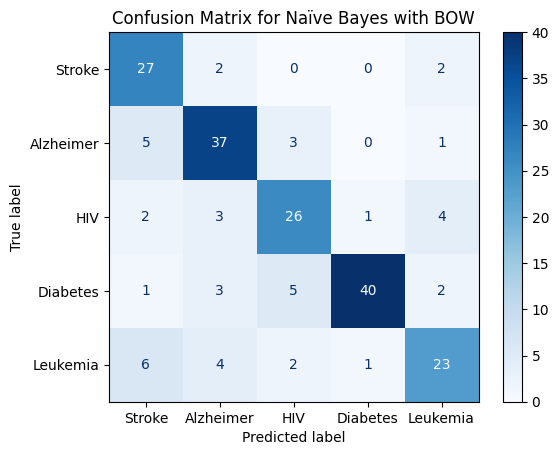


Incorrectly Classified Records:
                                          Raw Abstract  \
553  There are limited data describing incidence of...   
128  Facilitated self-management support programmes...   
893  Depressive symptoms can affect health outcomes...   
908  β-Nucleosides and their analogs are dominant c...   
134  Mortality prevention in T2D elderly population...   

                                    Processed Abstract True Label  \
553  limited data describing incidence symptomatic ...   Leukemia   
128  facilitated selfmanagement support programme b...   Diabetes   
893  depressive symptom affect health outcome peopl...        HIV   
908  βnucleosides analog dominant clinicallyused an...        HIV   
134  mortality prevention t2d elderly population ch...   Diabetes   

    Predicted Label  Correct  
553          Stroke    False  
128             HIV    False  
893          Stroke    False  
908       Alzheimer    False  
134       Alzheimer    False  


In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Train the Naïve Bayes model
nb_model = MultinomialNB().fit(X_train_bow, y_train)

# Predictions
nb_prediction = nb_model.predict(X_test_bow)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, nb_prediction))
print("Naïve Bayes Accuracy:", accuracy_score(y_test, nb_prediction))

# Generate Confusion Matrix
conf_matrix = confusion_matrix(y_test, nb_prediction)
class_names = list(set(y_test))  # Get unique class names from y_test

# Plot Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Naïve Bayes with BOW")
plt.show()

# Create a DataFrame for Results
results_df = pd.DataFrame({
    "Raw Abstract": df_raw_test,  # Unprocessed abstract for human readability
    "Processed Abstract": X_test,  # Processed abstract used for modeling
    "True Label": y_test,
    "Predicted Label": nb_prediction,
    "Correct": y_test == nb_prediction
})

# Display some incorrectly predicted records
incorrect_preds = results_df[~results_df["Correct"]]
print("\nIncorrectly Classified Records:")
print(incorrect_preds.head())

# Save results to a CSV file if needed
results_df.to_csv("naive_bayes_with_bow_results.csv", index=False)


### 1.2 Naïve Bayes with TF-IDF

Classification Report:
               precision    recall  f1-score   support

   Alzheimer       0.64      0.90      0.75        31
    Diabetes       0.84      0.83      0.84        46
         HIV       0.75      0.75      0.75        36
    Leukemia       0.97      0.76      0.86        51
      Stroke       0.69      0.67      0.68        36

    accuracy                           0.78       200
   macro avg       0.78      0.78      0.77       200
weighted avg       0.80      0.78      0.78       200

Naïve Bayes Accuracy: 0.78


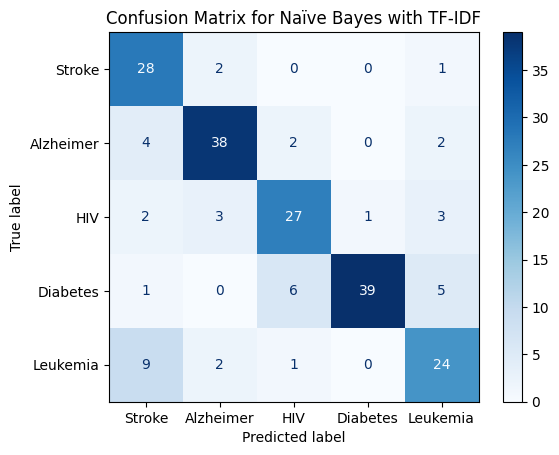


Incorrectly Classified Records:
                                          Raw Abstract  \
553  There are limited data describing incidence of...   
128  Facilitated self-management support programmes...   
893  Depressive symptoms can affect health outcomes...   
908  β-Nucleosides and their analogs are dominant c...   
506  We aimed to establish a discriminative gene-ex...   

                                    Processed Abstract True Label  \
553  limited data describing incidence symptomatic ...   Leukemia   
128  facilitated selfmanagement support programme b...   Diabetes   
893  depressive symptom affect health outcome peopl...        HIV   
908  βnucleosides analog dominant clinicallyused an...        HIV   
506  aimed establish discriminative geneexpressionb...   Leukemia   

    Predicted Label  Correct  
553          Stroke    False  
128             HIV    False  
893          Stroke    False  
908       Alzheimer    False  
506          Stroke    False  


In [11]:
# Train the Naïve Bayes model
nb_model = MultinomialNB().fit(X_train_tfidf, y_train)

# Predictions
nb_prediction = nb_model.predict(X_test_tfidf)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, nb_prediction))
print("Naïve Bayes Accuracy:", accuracy_score(y_test, nb_prediction))

# Generate Confusion Matrix
conf_matrix = confusion_matrix(y_test, nb_prediction)
class_names = list(set(y_test))  # Get unique class names from y_test

# Plot Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Naïve Bayes with TF-IDF")
plt.show()

# Create a DataFrame for Results
results_df = pd.DataFrame({
    "Raw Abstract": df_raw_test,  # Unprocessed abstract for human readability
    "Processed Abstract": X_test,  # Processed abstract used for modeling
    "True Label": y_test,
    "Predicted Label": nb_prediction,
    "Correct": y_test == nb_prediction
})

# Display some incorrectly predicted records
incorrect_preds = results_df[~results_df["Correct"]]
print("\nIncorrectly Classified Records:")
print(incorrect_preds.head())

# Save results to a CSV file if needed
results_df.to_csv("naive_bayes_with_tfidf_results.csv", index=False)


### 1.3 Naïve Bayes with n-gram


Classification Report:
               precision    recall  f1-score   support

   Alzheimer       0.69      0.81      0.75        31
    Diabetes       0.84      0.93      0.89        46
         HIV       0.76      0.78      0.77        36
    Leukemia       0.91      0.80      0.85        51
      Stroke       0.65      0.56      0.60        36

    accuracy                           0.79       200
   macro avg       0.77      0.78      0.77       200
weighted avg       0.79      0.79      0.78       200

Naïve Bayes Accuracy: 0.785


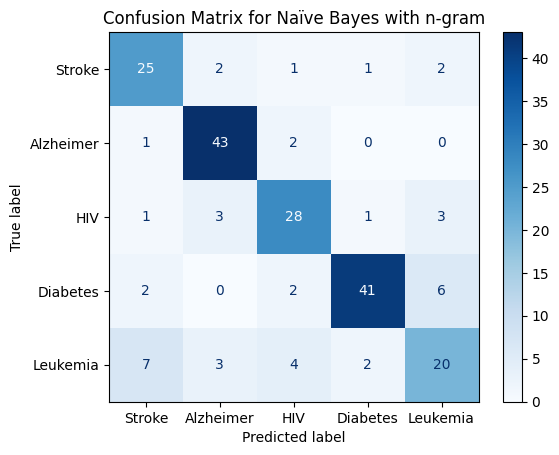


Incorrectly Classified Records:
                                          Raw Abstract  \
715  Head injury is associated with significant sho...   
128  Facilitated self-management support programmes...   
498  A 9-year-old boy with acute lymphoblastic leuk...   
893  Depressive symptoms can affect health outcomes...   
908  β-Nucleosides and their analogs are dominant c...   

                                    Processed Abstract True Label  \
715  head injury associated significant shortterm m...     Stroke   
128  facilitated selfmanagement support programme b...   Diabetes   
498  9yearold boy acute experienced hypersensitivit...   Leukemia   
893  depressive symptom affect health outcome peopl...        HIV   
908  βnucleosides analog dominant clinicallyused an...        HIV   

    Predicted Label  Correct  
715             HIV    False  
128             HIV    False  
498          Stroke    False  
893          Stroke    False  
908       Alzheimer    False  


In [12]:
# Train the Naïve Bayes model
nb_model = MultinomialNB().fit(X_train_ngram, y_train)

# Predictions
nb_prediction = nb_model.predict(X_test_ngram)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, nb_prediction))
print("Naïve Bayes Accuracy:", accuracy_score(y_test, nb_prediction))

# Generate Confusion Matrix
conf_matrix = confusion_matrix(y_test, nb_prediction)
class_names = list(set(y_test))  # Get unique class names from y_test

# Plot Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Naïve Bayes with n-gram")
plt.show()

# Create a DataFrame for Results
results_df = pd.DataFrame({
    "Raw Abstract": df_raw_test,  # Unprocessed abstract for human readability
    "Processed Abstract": X_test,  # Processed abstract used for modeling
    "True Label": y_test,
    "Predicted Label": nb_prediction,
    "Correct": y_test == nb_prediction
})

# Display some incorrectly predicted records
incorrect_preds = results_df[~results_df["Correct"]]
print("\nIncorrectly Classified Records:")
print(incorrect_preds.head())

# Save results to a CSV file if needed
results_df.to_csv("naive_bayes_with_ngram_results.csv", index=False)


## 2.1 k-Nearest Neighbor with BOW

Classification Report:
               precision    recall  f1-score   support

   Alzheimer       0.56      0.45      0.50        31
    Diabetes       0.41      0.20      0.26        46
         HIV       0.39      0.25      0.31        36
    Leukemia       0.37      0.82      0.51        51
      Stroke       0.20      0.08      0.12        36

    accuracy                           0.39       200
   macro avg       0.39      0.36      0.34       200
weighted avg       0.38      0.39      0.34       200

k-Nearest Neighbors Accuracy: 0.385


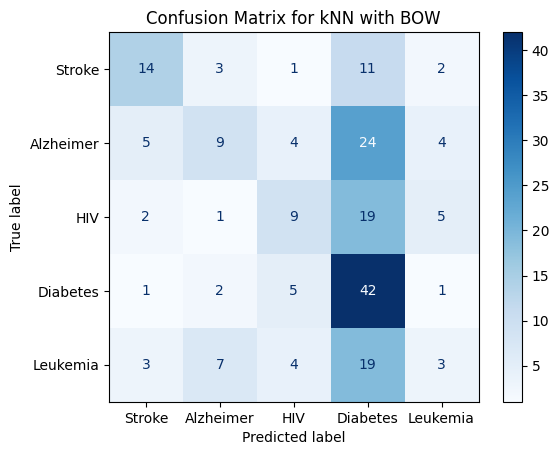


Incorrectly Classified Records:
                                          Raw Abstract  \
715  Head injury is associated with significant sho...   
713  Although aspirin can effectively reduce the oc...   
553  There are limited data describing incidence of...   
241  Microglia are emerging as key drivers of neuro...   
928  Universal precautions were introduced by the C...   

                                    Processed Abstract True Label  \
715  head injury associated significant shortterm m...     Stroke   
713  although aspirin effectively reduce occurrence...     Stroke   
553  limited data describing incidence symptomatic ...   Leukemia   
241  microglia emerging key driver neurological dis...  Alzheimer   
928  universal precaution introduced center disease...        HIV   

    Predicted Label  Correct  
715        Leukemia    False  
713        Leukemia    False  
553             HIV    False  
241          Stroke    False  
928        Leukemia    False  


In [13]:
# k-Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier

# Train the k-NN model
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train_bow, y_train)

# Predictions
knn_prediction = knn_model.predict(X_test_bow)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, knn_prediction))
print("k-Nearest Neighbors Accuracy:", accuracy_score(y_test, knn_prediction))

# Generate Confusion Matrix
conf_matrix = confusion_matrix(y_test, knn_prediction)
class_names = list(set(y_test))  # Get unique class names from y_test

# Plot Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for kNN with BOW")
plt.show()

# Create a DataFrame for Results
results_df = pd.DataFrame({
    "Raw Abstract": df_raw_test,  # Unprocessed abstract for human readability
    "Processed Abstract": X_test,  # Processed abstract used for modeling
    "True Label": y_test,
    "Predicted Label": knn_prediction,
    "Correct": y_test == knn_prediction
})

# Display some incorrectly predicted records
incorrect_preds = results_df[~results_df["Correct"]]
print("\nIncorrectly Classified Records:")
print(incorrect_preds.head())

# Save results to a CSV file if needed
results_df.to_csv("kNN_with_BOW_results.csv", index=False)


## 2.2 k-Nearest Neighbor with TF-IDF

Classification Report:
               precision    recall  f1-score   support

   Alzheimer       0.62      0.81      0.70        31
    Diabetes       0.79      0.74      0.76        46
         HIV       0.71      0.69      0.70        36
    Leukemia       0.75      0.86      0.80        51
      Stroke       0.83      0.53      0.64        36

    accuracy                           0.73       200
   macro avg       0.74      0.73      0.72       200
weighted avg       0.75      0.73      0.73       200

k-Nearest Neighbors Accuracy: 0.735


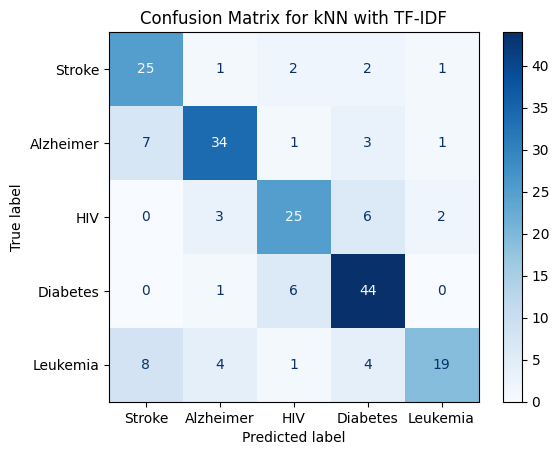


Incorrectly Classified Records:
                                          Raw Abstract  \
715  Head injury is associated with significant sho...   
82   To evaluate the efficacy and safety of dorzagl...   
893  Depressive symptoms can affect health outcomes...   
506  We aimed to establish a discriminative gene-ex...   
134  Mortality prevention in T2D elderly population...   

                                    Processed Abstract True Label  \
715  head injury associated significant shortterm m...     Stroke   
82   evaluate efficacy safety dorzagliatin treatmen...   Diabetes   
893  depressive symptom affect health outcome peopl...        HIV   
506  aimed establish discriminative geneexpressionb...   Leukemia   
134  mortality prevention t2d elderly population ch...   Diabetes   

    Predicted Label  Correct  
715       Alzheimer    False  
82           Stroke    False  
893          Stroke    False  
506             HIV    False  
134        Leukemia    False  


In [14]:
# Train the k-NN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_tfidf, y_train)

# Predictions
knn_prediction = knn_model.predict(X_test_tfidf)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, knn_prediction))
print("k-Nearest Neighbors Accuracy:", accuracy_score(y_test, knn_prediction))

# Generate Confusion Matrix
conf_matrix = confusion_matrix(y_test, knn_prediction)
class_names = list(set(y_test))  # Get unique class names from y_test

# Plot Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for kNN with TF-IDF")
plt.show()

# Create a DataFrame for Results
results_df = pd.DataFrame({
    "Raw Abstract": df_raw_test,  # Unprocessed abstract for human readability
    "Processed Abstract": X_test,  # Processed abstract used for modeling
    "True Label": y_test,
    "Predicted Label": knn_prediction,
    "Correct": y_test == knn_prediction
})

# Display some incorrectly predicted records
incorrect_preds = results_df[~results_df["Correct"]]
print("\nIncorrectly Classified Records:")
print(incorrect_preds.head())

# Save results to a CSV file if needed
results_df.to_csv("kNN_with_TF-IDF_results.csv", index=False)


## 2.3 k-Nearest Neighbor with n-gram

Classification Report:
               precision    recall  f1-score   support

   Alzheimer       0.25      0.23      0.24        31
    Diabetes       0.26      0.80      0.39        46
         HIV       0.00      0.00      0.00        36
    Leukemia       0.28      0.16      0.20        51
      Stroke       0.00      0.00      0.00        36

    accuracy                           0.26       200
   macro avg       0.16      0.24      0.17       200
weighted avg       0.17      0.26      0.18       200

k-Nearest Neighbors Accuracy: 0.26


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


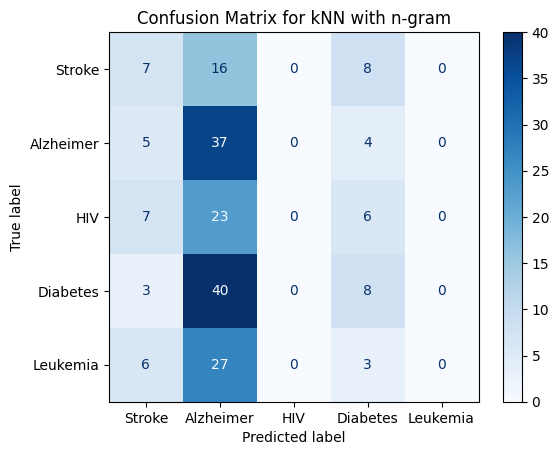


Incorrectly Classified Records:
                                          Raw Abstract  \
715  Head injury is associated with significant sho...   
353  Neurofibrillary tangles comprising hyperphosph...   
507  A 13-year-old female developed L-asparaginase ...   
713  Although aspirin can effectively reduce the oc...   
553  There are limited data describing incidence of...   

                                    Processed Abstract True Label  \
715  head injury associated significant shortterm m...     Stroke   
353  neurofibrillary tangle comprising hyperphospho...  Alzheimer   
507  13yearold female developed lasparaginase lasp ...   Leukemia   
713  although aspirin effectively reduce occurrence...     Stroke   
553  limited data describing incidence symptomatic ...   Leukemia   

    Predicted Label  Correct  
715       Alzheimer    False  
353        Diabetes    False  
507        Diabetes    False  
713        Diabetes    False  
553        Diabetes    False  


In [15]:
# k-Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier

# Train the k-NN model
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_train_ngram, y_train)

# Predictions
knn_prediction = knn_model.predict(X_test_ngram)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, knn_prediction))
print("k-Nearest Neighbors Accuracy:", accuracy_score(y_test, knn_prediction))

# Generate Confusion Matrix
conf_matrix = confusion_matrix(y_test, knn_prediction)
class_names = list(set(y_test))  # Get unique class names from y_test

# Plot Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for kNN with n-gram")
plt.show()

# Create a DataFrame for Results
results_df = pd.DataFrame({
    "Raw Abstract": df_raw_test,  # Unprocessed abstract for human readability
    "Processed Abstract": X_test,  # Processed abstract used for modeling
    "True Label": y_test,
    "Predicted Label": knn_prediction,
    "Correct": y_test == knn_prediction
})

# Display some incorrectly predicted records
incorrect_preds = results_df[~results_df["Correct"]]
print("\nIncorrectly Classified Records:")
print(incorrect_preds.head())

# Save results to a CSV file if needed
results_df.to_csv("kNN_with_n-gram_results.csv", index=False)


#Use SVM, Random Forest and performed an evaluation



In [16]:
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold as skf
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Perform Cross-Validation for SVM and Random Forest
print("SVM and Random Forest Cross-Validation Results:")

svm_accuracies = []
rf_accuracies = []

# Initialize cumulative confusion matrices
svm_conf_matrix = np.zeros((len(np.unique(y)), len(np.unique(y))))
rf_conf_matrix = np.zeros((len(np.unique(y)), len(np.unique(y))))

for fold, (train_index, test_index) in enumerate(skf.split(X_tfidf, y), 1):
    X_train, X_test = X_tfidf[train_index], X_tfidf[test_index]
    y_train, y_test = y[train_index], y[test_index]

    print(f"\nFold {fold}:")

    # Train SVM
    svm_model = SVC(kernel='linear', random_state=42)
    svm_model.fit(X_train, y_train)
    svm_predictions = svm_model.predict(X_test)
    svm_accuracies.append(accuracy_score(y_test, svm_predictions))

    # Update SVM confusion matrix
    svm_conf_matrix += confusion_matrix(y_test, svm_predictions)

    # Print SVM Classification Report
    print("\nSVM Classification Report:")
    print(classification_report(y_test, svm_predictions, target_names=label_encoder.classes_))

    # Train Random Forest
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    rf_predictions = rf_model.predict(X_test)
    rf_accuracies.append(accuracy_score(y_test, rf_predictions))

    # Update Random Forest confusion matrix
    rf_conf_matrix += confusion_matrix(y_test, rf_predictions)

    # Print Random Forest Classification Report
    print("\nRandom Forest Classification Report:")
    print(classification_report(y_test, rf_predictions, target_names=label_encoder.classes_))

# Print Average Accuracies
print(f"\nSVM Average Accuracy: {np.mean(svm_accuracies):.4f}")
print(f"Random Forest Average Accuracy: {np.mean(rf_accuracies):.4f}")

# Plot Confusion Matrices
class_names = label_encoder.classes_

# SVM Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(svm_conf_matrix.astype(int), annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Random Forest Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(rf_conf_matrix.astype(int), annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


SVM and Random Forest Cross-Validation Results:


NameError: name 'y' is not defined

# BERT


In [17]:
import re

# List of custom stop words
custom_stopwords = ['diabetes', 'alzheimer', 'leukemia', 'stroke', 'hiv',
                    'type 2', 'alzheimers', 'lymphoblastic', 'mellitus', 'cardiovascular']

# Function to preprocess abstracts
def preprocess_text(text, stopwords):
    """
    Remove custom stopwords from the text and clean it.
    """
    if text is None:  # Handle None values
        return ""
    # Convert text to lowercase
    text = text.lower()
    # Remove custom stop words
    for stopword in stopwords:
        text = re.sub(r'\b' + re.escape(stopword) + r'\b', '', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply preprocessing to the 'abstract' column

df_raw_train, df_raw_test, df_raw_label_train, df_raw_label_test

df_raw_combined=pd.concat([df_raw_train,df_raw_test])
df_raw_combined_label=pd.concat([df_raw_label_train,df_raw_label_test])

df_bert_data = df_raw_combined.copy()
df_bert_label = df_raw_combined_label.copy()

df_bert_data = df_bert_data.apply(lambda x: preprocess_text(x, custom_stopwords))



In [18]:
print(df_raw_combined.shape)
print(df_raw_train.shape)
print(df_raw_test.shape)
print(df_raw_label_train.shape)
print(df_raw_label_test.shape)
df_raw_combined=pd.concat([df_raw_train,df_raw_test])
df_raw_combined_label=pd.concat([df_raw_label_train,df_raw_label_test])
print(df_raw_combined.shape)
print(df_raw_combined_label.shape)

(1000,)
(800,)
(200,)
(800,)
(200,)
(1000,)
(1000,)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
<ipython-input-21-cb2e0169a0bb>:85: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
<ipython-input-21-cb2e0169a0bb>:48: UserWarning: To copy construct from a tensor, it is re

Epoch,Training Loss,Validation Loss,Accuracy
1,1.557900,1.508031,0.370000


<ipython-input-21-cb2e0169a0bb>:48: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-21-cb2e0169a0bb>:48: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


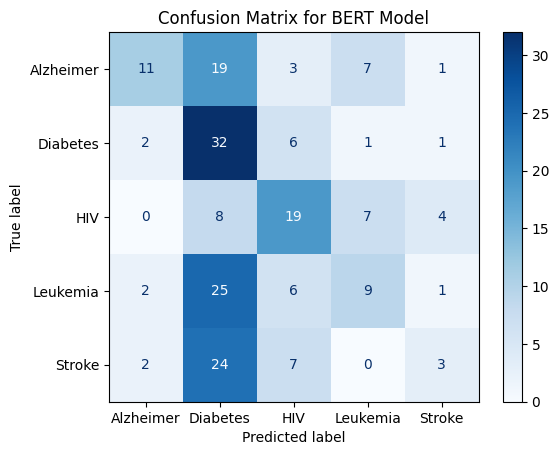

Predictions saved to 'bert_predictions_results.csv'

Classification Report:
              precision    recall  f1-score   support

   Alzheimer       0.65      0.27      0.38        41
    Diabetes       0.30      0.76      0.43        42
         HIV       0.46      0.50      0.48        38
    Leukemia       0.38      0.21      0.27        43
      Stroke       0.30      0.08      0.13        36

    accuracy                           0.37       200
   macro avg       0.42      0.36      0.34       200
weighted avg       0.42      0.37      0.34       200



In [21]:
# Import libraries
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import TrainingArguments, Trainer
import os

# Disable wandb
os.environ["WANDB_DISABLED"] = "true"

# Label Encoding
label_encoder = LabelEncoder()
df_bert_label_encoded = label_encoder.fit_transform(df_bert_label)

# Split both `df_bert_data` and `df_raw_combined` into training and validation sets
train_texts, val_texts, train_labels, val_labels, train_raw_texts, val_raw_texts = train_test_split(
    df_bert_data, df_bert_label_encoded, df_raw_combined, test_size=0.2, random_state=420
)

# Tokenize using BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def tokenize_data(texts):
    return tokenizer(
        texts.tolist(),
        padding=True,
        truncation=True,
        max_length=512,  # BERT's max token length
        return_tensors="pt"
    )

train_encodings = tokenize_data(train_texts)
val_encodings = tokenize_data(val_texts)

# Convert to Dataset objects
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx], dtype=torch.long)  # Ensure labels are integers
        return item

train_dataset = CustomDataset(train_encodings, train_labels.tolist())
val_dataset = CustomDataset(val_encodings, val_labels.tolist())

# Load BERT model
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased",
    num_labels=len(label_encoder.classes_)  # Number of classes
)

# Define training arguments
training_args = TrainingArguments(
    output_dir="./results",  # Directory to save model checkpoints
    evaluation_strategy="epoch",  # Evaluate after every epoch
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=1,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=10,
    save_strategy="epoch",
    save_total_limit=2,  # Keep only the last 2 checkpoints
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
)

# Define evaluation metric
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = torch.argmax(torch.tensor(logits), axis=1)
    return {"accuracy": (predictions == labels).float().mean().item()}

# Create Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

# Train the model
trainer.train()

# Evaluate the model
trainer.evaluate()

# Predictions and classification report
val_logits = trainer.predict(val_dataset).predictions
val_predictions = torch.argmax(torch.tensor(val_logits), axis=1).numpy()

# Generate confusion matrix
conf_matrix = confusion_matrix(val_labels, val_predictions)
class_names = label_encoder.classes_

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_names)
disp.plot(cmap="Blues")
disp.ax_.set_title("Confusion Matrix for BERT Model")
plt.show()

# Create DataFrame for results
results_df = pd.DataFrame({
    "Raw Abstract": val_raw_texts.tolist(),                     # Raw abstract
    "Processed Abstract": val_texts.tolist(),                   # Processed abstract
    "True Label": label_encoder.inverse_transform(val_labels),  # True label
    "Predicted Label": label_encoder.inverse_transform(val_predictions),  # Predicted label
    "Correct": val_labels == val_predictions                    # Correct or not
})

# Save to CSV
results_df.to_csv("bert_predictions_results.csv", index=False)
print("Predictions saved to 'bert_predictions_results.csv'")

# Print classification report
print("\nClassification Report:")
print(classification_report(val_labels, val_predictions, target_names=class_names))


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
<ipython-input-20-9c99ba1b2c93>:89: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
<ipython-input-20-9c99ba1b2c93>:52: UserWarning: To copy construct from a tensor, it is re

Epoch,Training Loss,Validation Loss,Accuracy
1,1.557900,1.508031,0.370000


<ipython-input-20-9c99ba1b2c93>:52: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-20-9c99ba1b2c93>:52: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


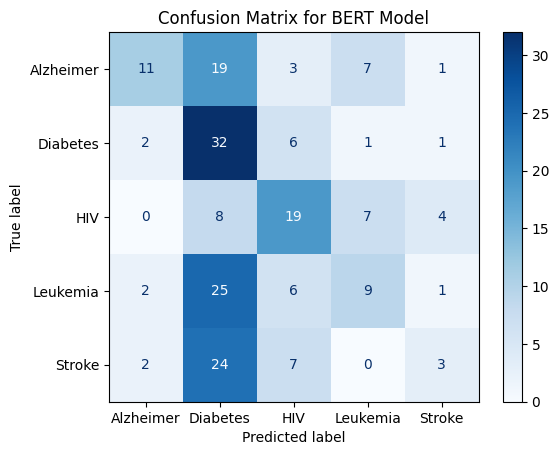

Predictions saved to 'bert_predictions_results.csv'

Classification Report:
              precision    recall  f1-score   support

   Alzheimer       0.65      0.27      0.38        41
    Diabetes       0.30      0.76      0.43        42
         HIV       0.46      0.50      0.48        38
    Leukemia       0.38      0.21      0.27        43
      Stroke       0.30      0.08      0.13        36

    accuracy                           0.37       200
   macro avg       0.42      0.36      0.34       200
weighted avg       0.42      0.37      0.34       200



In [20]:
# Install necessary libraries
#!pip install transformers datasets scikit-learn torch

# Import libraries
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import TrainingArguments, Trainer
from datasets import Dataset
import os

# Disable wandb
os.environ["WANDB_DISABLED"] = "true"

# Label Encoding
label_encoder = LabelEncoder()
df_bert_label_encoded = label_encoder.fit_transform(df_bert_label)

# Split into training and validation sets
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df_bert_data, df_bert_label_encoded, test_size=0.2, random_state=420
)

# Tokenize using BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def tokenize_data(texts):
    return tokenizer(
        texts.tolist(),
        padding=True,
        truncation=True,
        max_length=512,  # BERT's max token length
        return_tensors="pt"
    )

train_encodings = tokenize_data(train_texts)
val_encodings = tokenize_data(val_texts)

# Convert to Dataset objects
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx], dtype=torch.long)  # Ensure labels are integers
        return item

train_dataset = CustomDataset(train_encodings, train_labels.tolist())
val_dataset = CustomDataset(val_encodings, val_labels.tolist())

# Load BERT model
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased",
    num_labels=len(label_encoder.classes_)  # Number of classes
)

# Define training arguments
training_args = TrainingArguments(
    output_dir="./results",  # Directory to save model checkpoints
    evaluation_strategy="epoch",  # Evaluate after every epoch
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=1,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=10,
    save_strategy="epoch",
    save_total_limit=2,  # Keep only the last 2 checkpoints
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
)

# Define evaluation metric
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = torch.argmax(torch.tensor(logits), axis=1)
    return {"accuracy": (predictions == labels).float().mean().item()}

# Create Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

# Train the model
trainer.train()

# Evaluate the model
trainer.evaluate()

# Predictions and classification report
val_logits = trainer.predict(val_dataset).predictions
val_predictions = torch.argmax(torch.tensor(val_logits), axis=1).numpy()

# Generate confusion matrix
conf_matrix = confusion_matrix(val_labels, val_predictions)
class_names = label_encoder.classes_

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_names)
disp.plot(cmap="Blues")
disp.ax_.set_title("Confusion Matrix for BERT Model")
plt.show()

# Create DataFrame for results
results_df = pd.DataFrame({
    "Raw Abstract": df_raw_combined.iloc[val_texts.index].values,  # Raw abstract
    "Processed Abstract": val_texts.tolist(),                     # Processed abstract
    "True Label": label_encoder.inverse_transform(val_labels),    # True label
    "Predicted Label": label_encoder.inverse_transform(val_predictions),  # Predicted label
    "Correct": val_labels == val_predictions                      # Correct or not
})

# Save to CSV
results_df.to_csv("bert_predictions_results.csv", index=False)
print("Predictions saved to 'bert_predictions_results.csv'")

# Print classification report
print("\nClassification Report:")
print(classification_report(val_labels, val_predictions, target_names=class_names))


In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
import numpy as np

# Initialize KFold with 10 splits
kf = KFold(n_splits=10, shuffle=True, random_state=420)

# Prepare arrays to store metrics
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Perform K-Fold Cross-Validation
for fold, (train_index, val_index) in enumerate(kf.split(df_bert), 1):
    print(f"Fold {fold}")

    # Split data into train and validation sets for the current fold
    train_texts, val_texts = df_bert.iloc[train_index]['abstract'], df_bert.iloc[val_index]['abstract']
    train_labels, val_labels = df_bert.iloc[train_index]['label_encoded'], df_bert.iloc[val_index]['label_encoded']

    # Tokenize using BERT tokenizer
    train_encodings = tokenize_data(train_texts)
    val_encodings = tokenize_data(val_texts)

    # Create custom datasets
    train_dataset = CustomDataset(train_encodings, train_labels.tolist())
    val_dataset = CustomDataset(val_encodings, val_labels.tolist())

    # Load a fresh BERT model for each fold
    model = BertForSequenceClassification.from_pretrained(
        "bert-base-uncased",
        num_labels=len(label_encoder.classes_)
    )

    # Define training arguments
    training_args = TrainingArguments(
        output_dir=f"./results_fold_{fold}",
        evaluation_strategy="epoch",
        learning_rate=2e-5,
        per_device_train_batch_size=16,
        per_device_eval_batch_size=16,
        num_train_epochs=10,
        weight_decay=0.01,
        logging_dir=f"./logs_fold_{fold}",
        logging_steps=10,
        save_strategy="epoch",
        save_total_limit=2,
        load_best_model_at_end=True,
        metric_for_best_model="accuracy",
    )

    # Create Trainer
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=val_dataset,
        tokenizer=tokenizer,
        compute_metrics=compute_metrics
    )

    # Train the model
    trainer.train()

    # Evaluate the model
    val_logits = trainer.predict(val_dataset).predictions
    val_predictions = torch.argmax(torch.tensor(val_logits), axis=1).numpy()

    # Generate classification report for the current fold
    report = classification_report(val_labels, val_predictions, output_dict=True, target_names=label_encoder.classes_)

    # Store metrics
    accuracy_scores.append(report['accuracy'])
    precision_scores.append(np.mean([report[label]['precision'] for label in label_encoder.classes_]))
    recall_scores.append(np.mean([report[label]['recall'] for label in label_encoder.classes_]))
    f1_scores.append(np.mean([report[label]['f1-score'] for label in label_encoder.classes_]))

    print(f"Fold {fold} Classification Report:")
    print(classification_report(val_labels, val_predictions, target_names=label_encoder.classes_))

# Calculate and print average metrics across folds
print("\nCross-Validation Results:")
print(f"Average Accuracy: {np.mean(accuracy_scores):.4f}")
print(f"Average Precision: {np.mean(precision_scores):.4f}")
print(f"Average Recall: {np.mean(recall_scores):.4f}")
print(f"Average F1-Score: {np.mean(f1_scores):.4f}")
